In [0]:
# Array based union find data structure

# P: The array, which encodes the set membership of all the elements

class UFarray:
    def __init__(self):
        # Array which holds label -> set equivalences
        self.P = []

        # Name of the next label, when one is created
        self.label = 0

    def makeLabel(self):
        r = self.label
        self.label += 1
        self.P.append(r)
        return r
    
    # Makes all nodes "in the path of node i" point to root
    def setRoot(self, i, root):
        while self.P[i] < i:
            j = self.P[i]
            self.P[i] = root
            i = j
        self.P[i] = root

    # Finds the root node of the tree containing node i
    def findRoot(self, i):
        while self.P[i] < i:
            i = self.P[i]
        return i
    
    # Finds the root of the tree containing node i
    # Simultaneously compresses the tree
    def find(self, i):
        root = self.findRoot(i)
        self.setRoot(i, root)
        return root
    
    # Joins the two trees containing nodes i and j
    # Modified to be less agressive about compressing paths
    # because performance was suffering some from over-compression
    def union(self, i, j):
        if i != j:
            root = self.findRoot(i)
            rootj = self.findRoot(j)
            if root > rootj: root = rootj
            self.setRoot(j, root)
            self.setRoot(i, root)
    
    def flatten(self):
        for i in range(1, len(self.P)):
            self.P[i] = self.P[self.P[i]]
    
    def flattenL(self):
        k = 1
        for i in range(1, len(self.P)):
            if self.P[i] < i:
                self.P[i] = self.P[self.P[i]]
            else:
                self.P[i] = k
                k += 1

In [0]:
from PIL import Image, ImageDraw
import sys
import math, random
from itertools import product

# Array based union find data structure

# P: The array, which encodes the set membership of all the elements

class UFarray:
    def __init__(self):
        # Array which holds label -> set equivalences
        self.P = []

        # Name of the next label, when one is created
        self.label = 0

    def makeLabel(self):
        r = self.label
        self.label += 1
        self.P.append(r)
        return r
    
    # Makes all nodes "in the path of node i" point to root
    def setRoot(self, i, root):
        while self.P[i] < i:
            j = self.P[i]
            self.P[i] = root
            i = j
        self.P[i] = root

    # Finds the root node of the tree containing node i
    def findRoot(self, i):
        while self.P[i] < i:
            i = self.P[i]
        return i
    
    # Finds the root of the tree containing node i
    # Simultaneously compresses the tree
    def find(self, i):
        root = self.findRoot(i)
        self.setRoot(i, root)
        return root
    
    # Joins the two trees containing nodes i and j
    # Modified to be less agressive about compressing paths
    # because performance was suffering some from over-compression
    def union(self, i, j):
        if i != j:
            root = self.findRoot(i)
            rootj = self.findRoot(j)
            if root > rootj: root = rootj
            self.setRoot(j, root)
            self.setRoot(i, root)
    
    def flatten(self):
        for i in range(1, len(self.P)):
            self.P[i] = self.P[self.P[i]]
    
    def flattenL(self):
        k = 1
        for i in range(1, len(self.P)):
            if self.P[i] < i:
                self.P[i] = self.P[self.P[i]]
            else:
                self.P[i] = k
                k += 1
                
def run(img):
    data = img.load()
    width, height = img.size
 
    # Union find data structure
    uf = UFarray()
 
    #
    # First pass
    #
 
    # Dictionary of point:label pairs
    labels = {}
 
    for y, x in product(range(height), range(width)):
 
        #
        # Pixel names were chosen as shown:
        #
        #   -------------
        #   | a | b | c |
        #   -------------
        #   | d | e |   |
        #   -------------
        #   |   |   |   |
        #   -------------
        #
        # The current pixel is e
        # a, b, c, and d are its neighbors of interest
        #
        # 255 is white, 0 is black
        # White pixels part of the background, so they are ignored
        # If a pixel lies outside the bounds of the image, it default to white
        #
 
        # If the current pixel is white, it's obviously not a component...
        if data[x, y] == 255:
            pass
 
        # If pixel b is in the image and black:
        #    a, d, and c are its neighbors, so they are all part of the same component
        #    Therefore, there is no reason to check their labels
        #    so simply assign b's label to e
        elif y > 0 and data[x, y-1] == 0:
            labels[x, y] = labels[(x, y-1)]
 
        # If pixel c is in the image and black:
        #    b is its neighbor, but a and d are not
        #    Therefore, we must check a and d's labels
        elif x+1 < width and y > 0 and data[x+1, y-1] == 0:
 
            c = labels[(x+1, y-1)]
            labels[x, y] = c
 
            # If pixel a is in the image and black:
            #    Then a and c are connected through e
            #    Therefore, we must union their sets
            if x > 0 and data[x-1, y-1] == 0:
                a = labels[(x-1, y-1)]
                uf.union(c, a)
 
            # If pixel d is in the image and black:
            #    Then d and c are connected through e
            #    Therefore we must union their sets
            elif x > 0 and data[x-1, y] == 0:
                d = labels[(x-1, y)]
                uf.union(c, d)
 
        # If pixel a is in the image and black:
        #    We already know b and c are white
        #    d is a's neighbor, so they already have the same label
        #    So simply assign a's label to e
        elif x > 0 and y > 0 and data[x-1, y-1] == 0:
            labels[x, y] = labels[(x-1, y-1)]
 
        # If pixel d is in the image and black
        #    We already know a, b, and c are white
        #    so simpy assign d's label to e
        elif x > 0 and data[x-1, y] == 0:
            labels[x, y] = labels[(x-1, y)]
 
        # All the neighboring pixels are white,
        # Therefore the current pixel is a new component
        else: 
            labels[x, y] = uf.makeLabel()
 
    #
    # Second pass
    #
 
    uf.flatten()
 
    colors = {}

    # Image to display the components in a nice, colorful way
    output_img = Image.new("RGB", (width, height))
    outdata = output_img.load()

    for (x, y) in labels:
 
        # Name of the component the current point belongs to
        component = uf.find(labels[(x, y)])

        # Update the labels with correct information
        labels[(x, y)] = component
 
        # Associate a random color with this component 
        if component not in colors: 
            colors[component] = (random.randint(0,255), random.randint(0,255),random.randint(0,255))

        # Colorize the image
        outdata[x, y] = colors[component]

    return (labels, output_img)

In [0]:
# Open the image
img = Image.open('/content/fig4.jpg')
img.show()

# Threshold the image, this implementation is designed to process b+w
# images only
img = img.point(lambda p: p > 190 and 255)
img = img.convert('1')

# labels is a dictionary of the connected component data in the form:
#     (x_coordinate, y_coordinate) : component_id
#
# if you plan on processing the component data, this is probably what you
# will want to use
#
# output_image is just a frivolous way to visualize the components.
(labels, output_img) = run(img)

output_img.show()



In [122]:
type(output_img)

PIL.Image.Image

In [123]:
import numpy as np
pix = np.array(output_img)
type(pix)

numpy.ndarray

In [124]:
pix.shape

(50, 50, 3)

In [125]:
uniqueValues = np.unique(pix)
uniqueValues

array([  0,  15,  32,  34,  36,  40,  51,  62,  65,  78, 119, 152, 166,
       194, 196, 197, 244, 251], dtype=uint8)

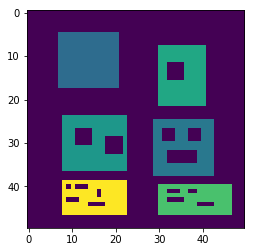

In [126]:
gray = cv2.cvtColor(pix, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [127]:
gray.shape

(50, 50)

In [128]:
uniqueValues = np.unique(gray)
uniqueValues

array([  0,  63,  71,  94, 106, 127, 178], dtype=uint8)

In [129]:
len(uniqueValues) - 1

6

In [0]:
# Open the image
img = Image.open('/content/fig4.jpg')
img.show()
# img = np.array(img)
# img = cv2.bitwise_not(img)
# img = Image.fromarray(img)

# Threshold the image, this implementation is designed to process b+w
# images only
img = img.point(lambda p: p < 190 and 255)
img = img.convert('1')

# labels is a dictionary of the connected component data in the form:
#     (x_coordinate, y_coordinate) : component_id
#
# if you plan on processing the component data, this is probably what you
# will want to use
#
# output_image is just a frivolous way to visualize the components.
(labels, output_img_holes) = run(img)

output_img_holes.show()

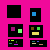

In [144]:
output_img_holes

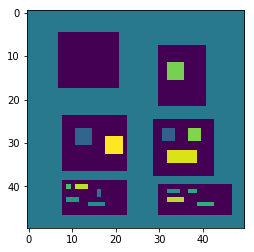

In [145]:
pix_holes = np.array(output_img_holes)
gray_holes = cv2.cvtColor(pix_holes, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_holes)

In [146]:
uniqueValues_holes = np.unique(gray_holes)
len(uniqueValues_holes) - 2


15